In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

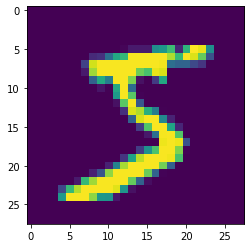

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255

In [6]:
X_test = X_test/255

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [9]:
encoder = Sequential()
encoder.add(Flatten(input_shape=(28,28)))
encoder.add(Dense(400, activation = 'relu'))
encoder.add(Dense(200, activation = 'relu'))
encoder.add(Dense(100, activation = 'relu'))
encoder.add(Dense(50, activation = 'relu'))
encoder.add(Dense(25, activation = 'relu'))

In [11]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation= 'relu'))
decoder.add(Dense(100,activation = 'relu'))
decoder.add(Dense(200,activation = 'relu'))
decoder.add(Dense(400,activation = 'relu'))
decoder.add(Dense(784,activation = 'sigmoid'))
decoder.add(Reshape([28,28]))



In [12]:
autoencoder = Sequential([encoder,decoder])

In [13]:
autoencoder.compile(loss = 'binary_crossentropy',optimizer = SGD(learning_rate=1.5),metrics=['accuracy'])

In [14]:
autoencoder.fit(X_train,X_train,epochs=5,validation_data = (X_test,X_test))

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2499 - val_loss: 0.2072
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1828 - val_loss: 0.1688
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1595 - val_loss: 0.1520
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1482 - val_loss: 0.1443
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1414 - val_loss: 0.1354


In [15]:
passed_images = autoencoder.predict(X_test[:10])

original image


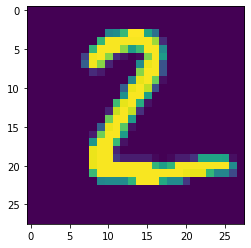

after autoencoder


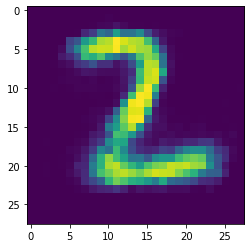

In [17]:
n= 1

print('original image')
plt.imshow(X_test[n])
plt.show()
print('after autoencoder')
plt.imshow(passed_images[n])

In [18]:
from tensorflow.keras.layers import GaussianNoise

In [19]:
sample = GaussianNoise(0.2)

In [20]:
noisey = sample(X_test[:10],training = True)

ORIGINAL


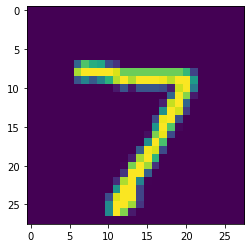

NOISE VERSION


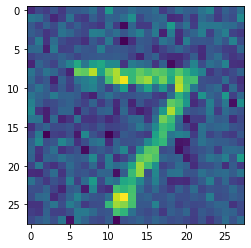

In [21]:
n=0

print('ORIGINAL')
plt.imshow(X_test[n])
plt.show()
print('NOISE VERSION')
plt.imshow(noisey[n])

In [22]:
encoder = Sequential()
encoder.add(Flatten(input_shape=(28,28)))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400, activation = 'relu'))
encoder.add(Dense(200, activation = 'relu'))
encoder.add(Dense(100, activation = 'relu'))
encoder.add(Dense(50, activation = 'relu'))
encoder.add(Dense(25, activation = 'relu'))

In [23]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation= 'relu'))
decoder.add(Dense(100,activation = 'relu'))
decoder.add(Dense(200,activation = 'relu'))
decoder.add(Dense(400,activation = 'relu'))
decoder.add(Dense(784,activation = 'sigmoid'))
decoder.add(Reshape([28,28]))



In [24]:
noise_remover = Sequential([encoder,decoder])

In [26]:
noise_remover.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
noise_remover.fit(X_test,X_test,epochs = 8)

Epoch 1/8
313/313 [==============================] - 3s 7ms/step - loss: 0.2483 - accuracy: 0.0901
Epoch 2/8
313/313 [==============================] - 2s 7ms/step - loss: 0.1774 - accuracy: 0.1669
Epoch 3/8
313/313 [==============================] - 2s 7ms/step - loss: 0.1555 - accuracy: 0.1944
Epoch 4/8
313/313 [==============================] - 2s 7ms/step - loss: 0.1452 - accuracy: 0.2088
Epoch 5/8
313/313 [==============================] - 2s 7ms/step - loss: 0.1391 - accuracy: 0.2148
Epoch 6/8
313/313 [==============================] - 2s 7ms/step - loss: 0.1342 - accuracy: 0.2216
Epoch 7/8
313/313 [==============================] - 2s 7ms/step - loss: 0.1308 - accuracy: 0.2266
Epoch 8/8
313/313 [==============================] - 2s 7ms/step - loss: 0.1282 - accuracy: 0.2289


In [28]:
ten_noisey_images = sample(X_test[:10],training= True)

In [29]:
denoised = noise_remover(ten_noisey_images)

ORIGINAL IMAGE


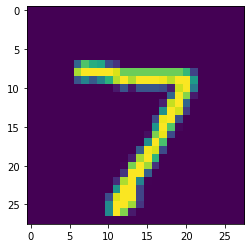

NOISE ADDED


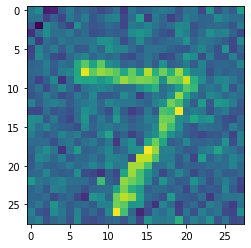

AFTER NOISE REMOVAL FROM AUTOENCODER


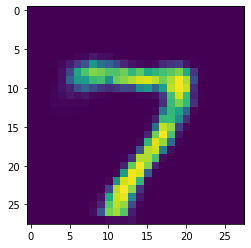

In [32]:
print('ORIGINAL IMAGE')
plt.imshow(X_test[n])
plt.show()
print('NOISE ADDED')
plt.imshow(ten_noisey_images[n])
plt.show()
print('AFTER NOISE REMOVAL FROM AUTOENCODER')
plt.imshow(denoised[n])
plt.show()